In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = Path.cwd().parent.parent
filePath = str(path) + "/data_process/train_processing/train_data_occupancy.parquet"
df = pd.read_parquet(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748 entries, 2007-12-13 to 2010-01-15
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   guest_count  748 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


In [5]:
train = df.iloc[36:-115]
test = df.iloc[-115:-100]
print(train.shape)
print(test.shape)

(597, 1)
(15, 1)


Text(0.5, 1.0, 'train')

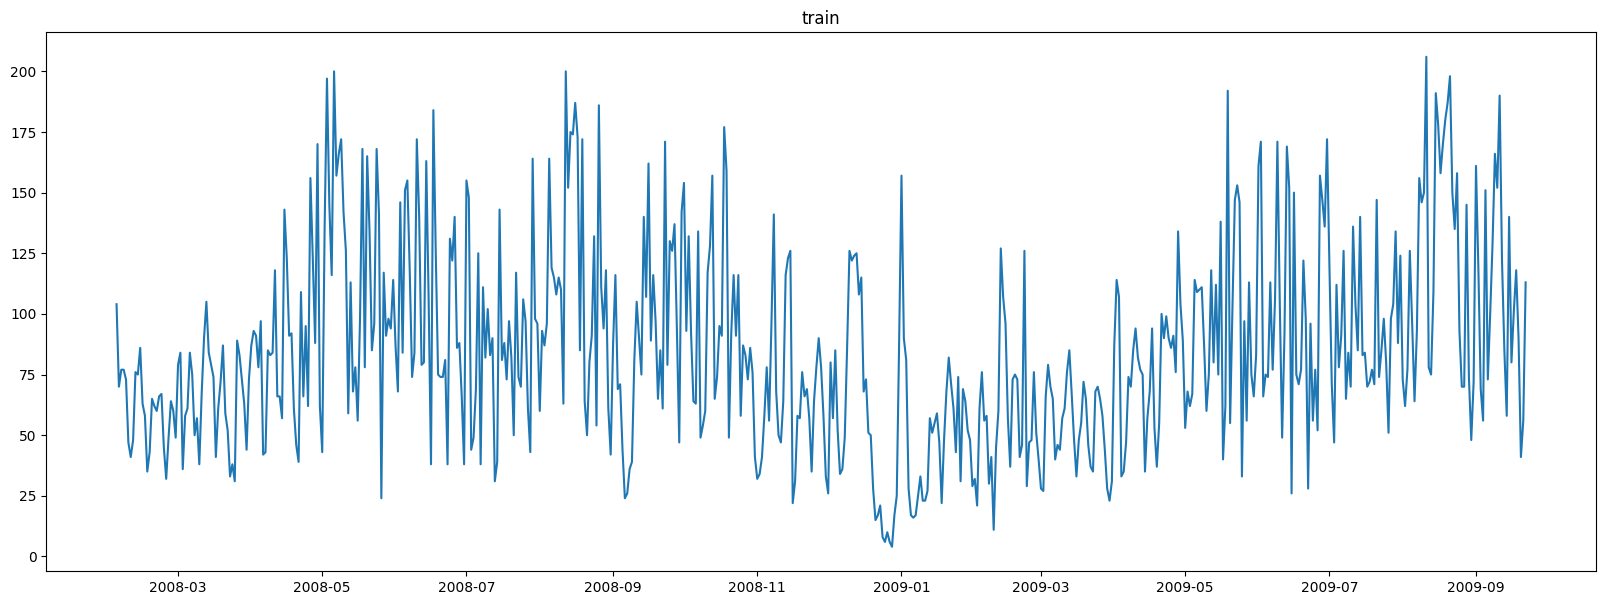

In [6]:
plt.figure(figsize=(20, 7))
plt.plot(train.index,train["guest_count"])
plt.title("train")

Text(0.5, 1.0, 'test')

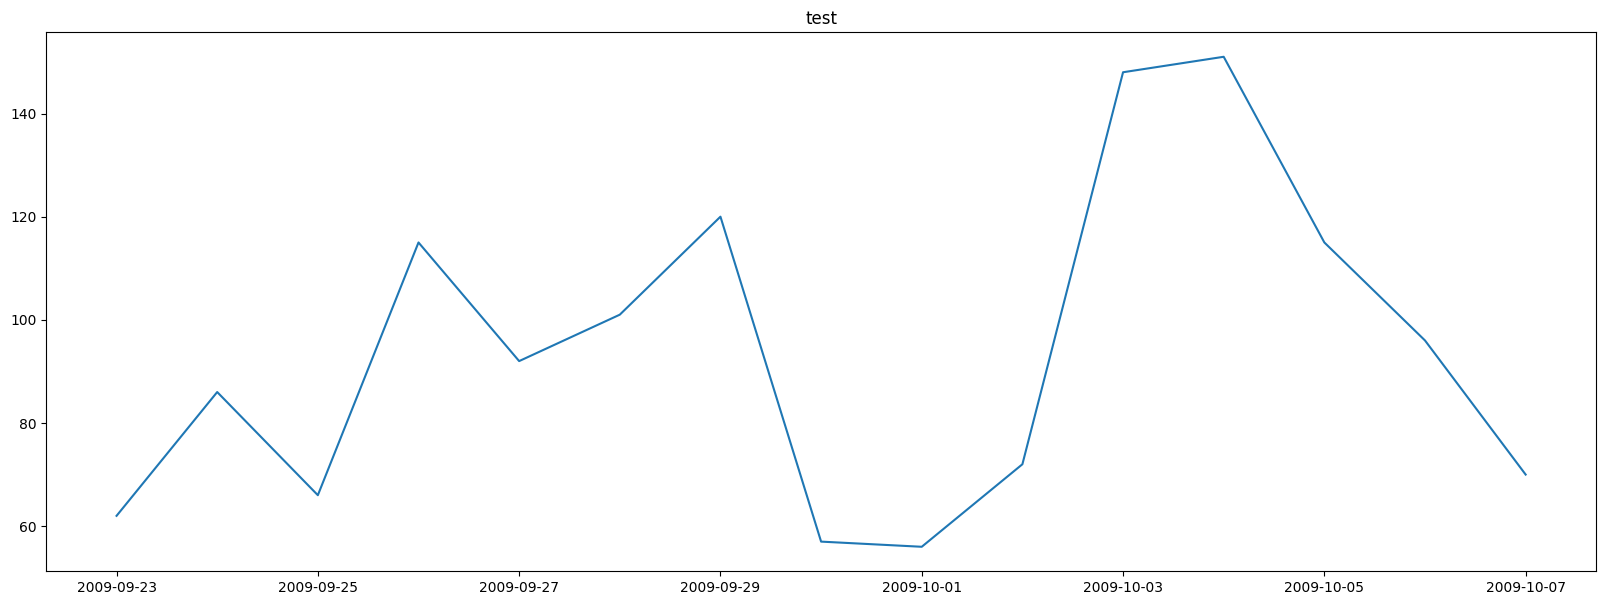

In [7]:
plt.figure(figsize=(20, 7))
plt.plot(test.index,test["guest_count"])
plt.title("test")

In [8]:
result = adfuller(train["guest_count"])
# Ispis rezultata
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretacija rezultata
if result[1] < 0.05:
    print("\nSerija je stacionarna.")
else:
    print("\nSerija nije stacionarna i treba je diferencirati")

ADF Statistic: -3.453879508700103
p-value: 0.009253644590288712
Critical Values:
   1%: -3.441635870156286
   5%: -2.866518854162241
   10%: -2.569421591856497

Serija je stacionarna.


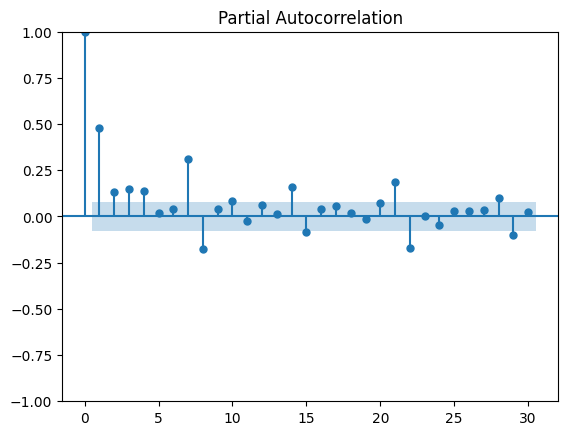

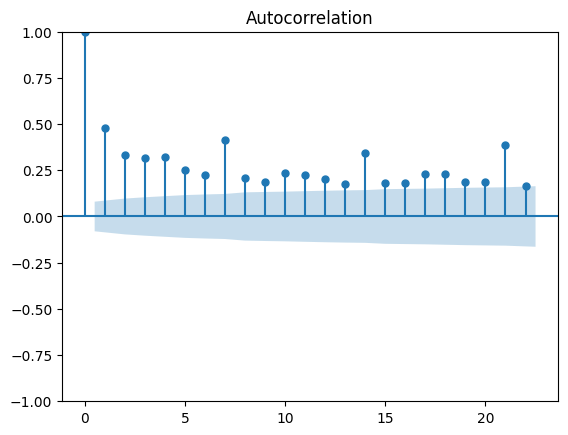

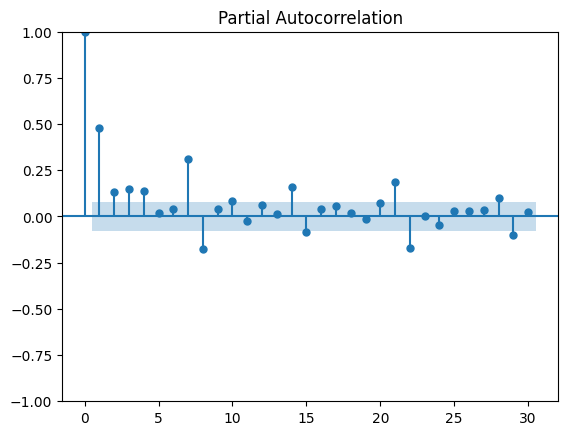

In [9]:
plot_acf(train["guest_count"], lags = 22)
plot_pacf(train["guest_count"], lags = 30)

In [10]:
model = auto_arima(train["guest_count"], seasonal = True, trace = True, approx = False, m = 12)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5931.874, Time=2.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6155.404, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6075.574, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5963.038, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6153.404, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5937.407, Time=1.20 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=5937.422, Time=1.58 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=5929.858, Time=6.75 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=5937.838, Time=5.66 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=5924.986, Time=9.95 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5930.863, Time=7.06 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=9.15 sec
 ARIMA(2,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=8.64 sec
 ARIMA(3,1,2)(2,0,2)[12] intercept   : AIC=5936.900, Time=10.77 sec
 ARIMA(2,1,3)(2,0,2)[12] int

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  597
Model:             SARIMAX(5, 1, 5)x(2, 0, [], 12)   Log Likelihood               -2894.772
Date:                             Thu, 14 Mar 2024   AIC                           5815.545
Time:                                     11:56:09   BIC                           5872.618
Sample:                                 02-04-2008   HQIC                          5837.769
                                      - 09-22-2009                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8152      0.056    -32.388      0.000      -1.925      -1.705
ar.L2         -1.8301      0.119    -15.347      0.000      -2.064      -1.596
ar.L3         -1.0148      0.146     -6.952      0.000      -1.301      -0.729
ar.L4         -0.0076      0.115     -0.066      0.947      -0.233       0.218
ar.L5          0.4251      0.050      8.530      0.000       0.327       0.523
ma.L1          1.2914      0.037     35.271      0.000       1.220       1.363
ma.L2          0.6544      0.050     13.165      0.000       0.557       0.752
ma.L3         -0.4528      0.053     -8.546      0.000      -0.557      -0.349
ma.L4         -1.1157      0.044    -25.169      0.000      -1.203      -1.029
ma.L5         -0.8339      0.033    -25.189      0.000      -0.899      -0.769
ar.S.L12       0.0242      0.053      0.457      0.648      -0.080       0.128
ar.S.L24      -0.1203      0.049     -2.435      0.015      -0.217      -0.023
sigma2      1103.5426     72.165     15.292      0.000     962.103    1244.982
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.36
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               1.23   Skew:                             0.22
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# best prediction
mod = ARIMA(train["guest_count"], order = (6,0,1), seasonal_order = (5,0,2,7))
#mod = ARIMA(train["guest_count"], order = (5,1,5), seasonal_order = (2,0,0,12))
mod = mod.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          guest_count   No. Observations:                  597
Model:             ARIMA(6, 0, 1)x(5, 0, [1, 2], 7)   Log Likelihood               -2890.752
Date:                              Thu, 14 Mar 2024   AIC                           5813.505
Time:                                      12:03:13   BIC                           5883.775
Sample:                                  02-04-2008   HQIC                          5840.866
                                       - 09-22-2009                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.9642     13.074      6.499      0.000      59.339     110.589
ar.L1          0.3021      9.168      0.033      0.974     -17.667      18.272
ar.L2          0.0937      4.245      0.022      0.982      -8.227       8.415
ar.L3          0.0074      0.181      0.041      0.967      -0.347       0.362
ar.L4          0.1163      0.050      2.345      0.019       0.019       0.214
ar.L5          0.0083      1.054      0.008      0.994      -2.057       2.074
ar.L6         -0.0178      0.106     -0.168      0.866      -0.225       0.190
ma.L1          0.1612      9.166      0.018      0.986     -17.805      18.127
ar.S.L7        0.2856      8.590      0.033      0.973     -16.550      17.121
ar.S.L14       0.3538      6.854      0.052      0.959     -13.079      13.787
ar.S.L21       0.1351      0.376      0.359      0.719      -0.602       0.873
ar.S.L28       0.0765      1.340      0.057      0.954      -2.551       2.704
ar.S.L35       0.0046      0.079      0.059      0.953      -0.150       0.159
ma.S.L7       -0.1137      8.592     -0.013      0.989     -16.955      16.727
ma.S.L14      -0.3082      5.377     -0.057      0.954     -10.846      10.230
sigma2       933.2394     54.557     17.106      0.000     826.309    1040.170
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.13
Prob(Q):                              0.98   Prob(JB):                         0.01
Heteroskedasticity (H):               1.20   Skew:                             0.23
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

597 611


<Axes: >

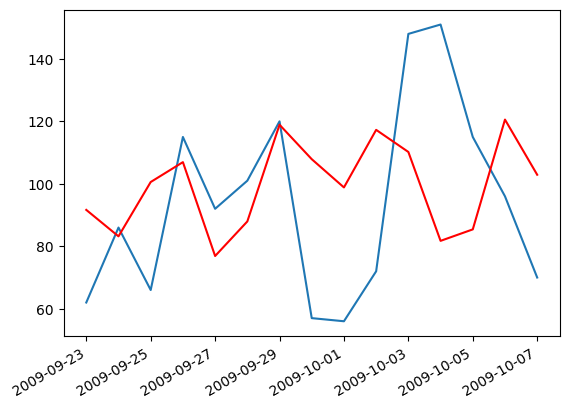

In [16]:
start = len(train)
end = len(test) + len(train) - 1
 
print(start,end)
pred = mod.predict(start = start, end = end)

plt.plot(test.index, test["guest_count"])
pred.plot(color = "red")

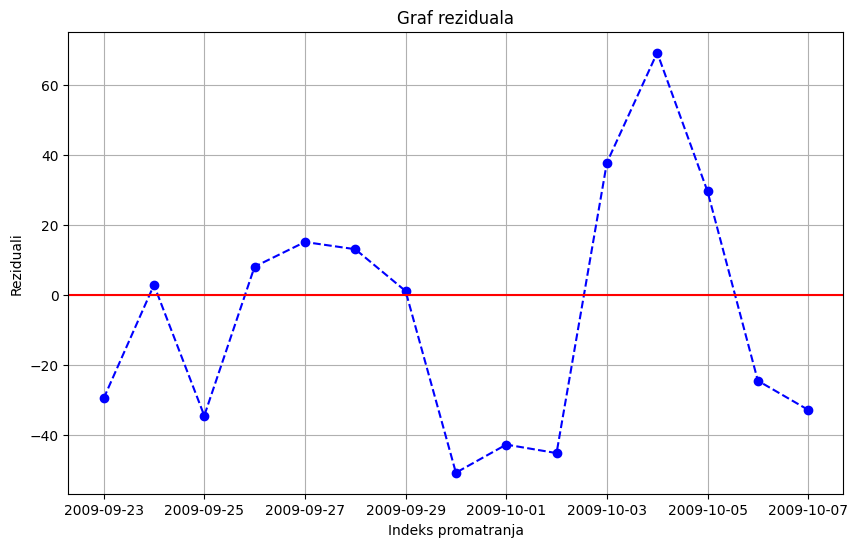

In [17]:
#racunanje residuala
residuals = test["guest_count"] - pred

# Vizualizacija reziduala
plt.figure(figsize=(10, 6))  # Postavljanje veličine figure
plt.plot(residuals, marker='o', linestyle='--', color='blue')  # Crtanje grafa reziduala
plt.title('Graf reziduala')
plt.xlabel('Indeks promatranja')
plt.ylabel('Reziduali')
plt.axhline(y=0, color='red', linestyle='-')  # Crta horizontalnu liniju na y=0 za referencu
plt.grid(True)
plt.show()